## Worksheet 2

### This is the second set of exercises for the Open Quantum Systems course. As before, there are both analytical and numerical components to the exercises. Each of the 8 questions below is worth 4 marks. 

---

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
from random import random
from scipy.linalg import expm

#common matrices
sigma_x = np.array([[0,1],[1,0]])
sigma_y = np.array([[0,-1j],[1j,0]])
sigma_z = np.array([[1,0],[0,-1]])
identity = np.array([[1,0],[0,1]])

#common states
zero = np.array([[1],[0]])
one = np.array([[0],[1]])
plus = (1/np.sqrt(2))*np.array([[1],[1]])
minus = (1/np.sqrt(2))*np.array([[1],[-1]])

## 1. 
Hamiltonian dynamics for mixed states (in the Schrödinger picture) is described by the von Neumann equation 

$$\frac{{\rm d}\hat{\rho}}{{\rm d}t} = \frac{1}{{\rm i}\hbar}[\hat{H},\hat{\rho}].$$

Suppose that the Hamiltonian comprises a sum of two terms, $\hat{H} = \hat{H}_0 + \hat{H}_1$. The density matrix in the interaction picture generated by $\hat{H}_0$ is defined by

$$ \hat{\rho}_I(t) = \hat{U}^\dagger_0(t,t_0) \hat{\rho}(t) \hat{U}_0(t,t_0),$$

where $\hat{U}_0(t,t_0) = {\rm e}^{-{\rm i}\hat{H}_0 (t-t_0)/\hbar}$, $\hat{\rho}(t)$ is the density matrix in the Schrödinger picture, and $t_0$ is an (arbitrary) initial time. Show that the state in the interaction picture obeys a differential equation of the form

$$ \frac{{\rm d}\hat{\rho}_I}{{\rm d}t} = \frac{1}{{\rm i}\hbar} [\hat{H}_I(t), \hat{\rho}_I(t)],$$

and give an explicit expression for the interaction-picture Hamiltonian $\hat{H}_I(t)$. What is the general solution of this equation in terms of the initial condition $\hat{\rho}(t_0)$?

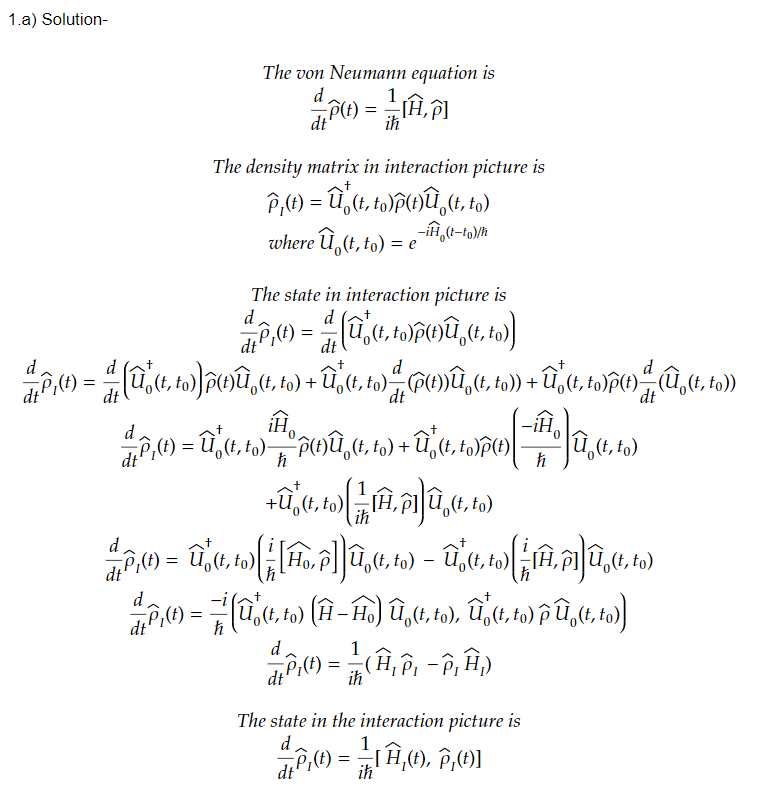

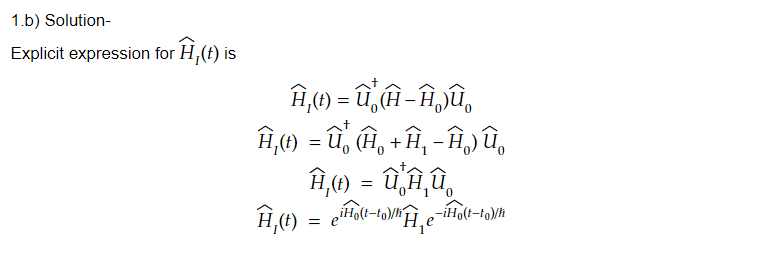

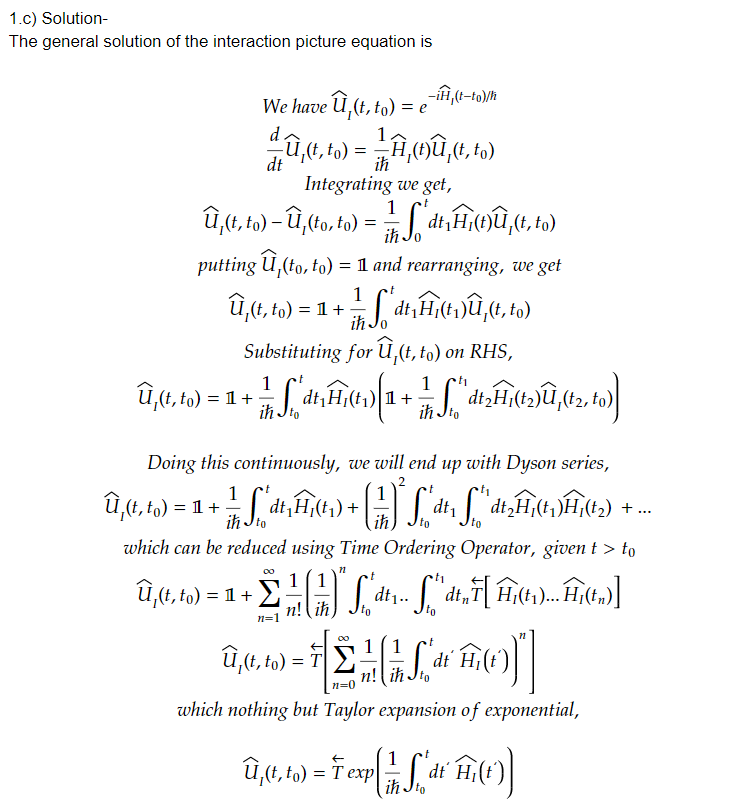

## 2.
A thermal equilibrium state is a mixed state with two key properties: <br>
    (i) it is stationary (unchanging) under Hamiltonian dynamics and <br>
    (ii) the probability $p_i$ of finding the system with energy $E_i$ is given by the Boltzmann distribution of statistical mechanics, i.e. $p_i = {\rm e}^{-\beta E_i}/Z$, where $\beta = 1/k_BT$ is the inverse temperature and $Z = \sum_i {\rm e}^{-\beta E_i}$ is the partition function.<br>

In quantum mechanics, the thermal state of a system whose dynamics are governed by the Hamiltonian $\hat{H}$ is given by

$$\hat{\rho}_\beta = \frac{{\rm e}^{-\beta \hat{H}}}{Z}, $$

where $Z = {\rm tr}[{\rm e}^{-\beta \hat{H}}]$.

(a) Show that this state obeys both properties (i) and (ii).    

(b) For a qubit with Hamiltonian $\hat{H} = \tfrac{1}{2}\hbar\omega \hat{\sigma}_z$, show that

$$ \hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbb{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right].$$

(Hint: take a look at Exercise 1(a), Worksheet 1)

(c) Find analytical expressions for the expectation values of the three Pauli matrices in the above thermal equilibrium state. Plot the thermal expectation value of $\langle \hat{\sigma}_z\rangle$ as a function of dimensionless temperature, $k_B T/\hbar\omega$.

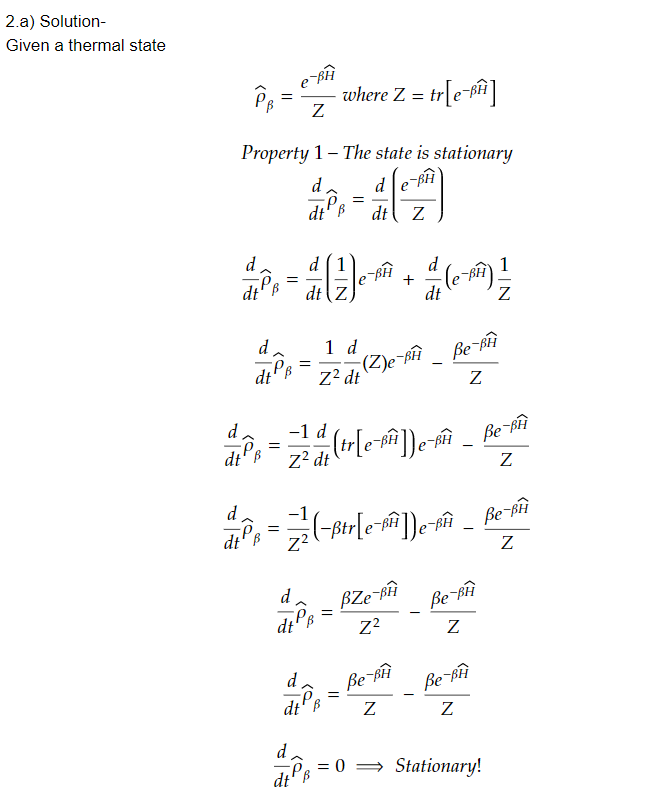

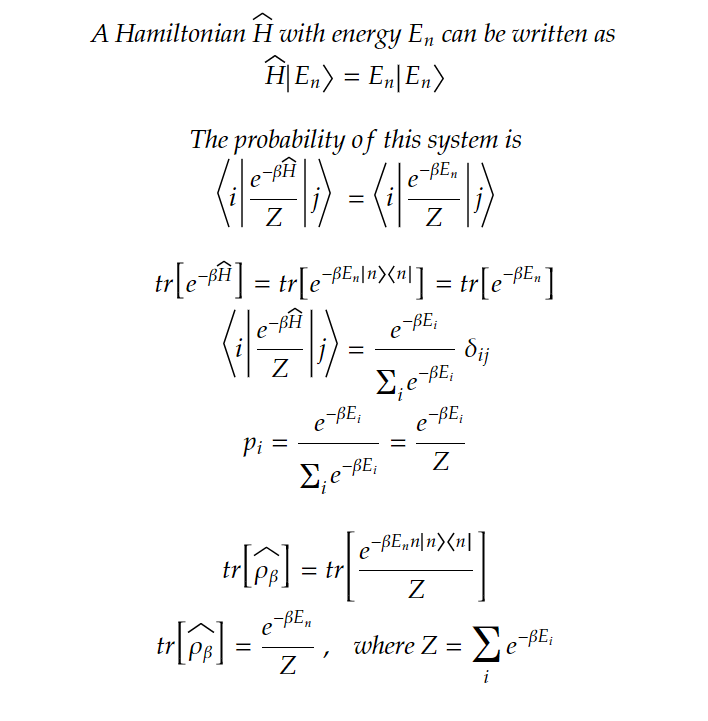

2.b) Solution-
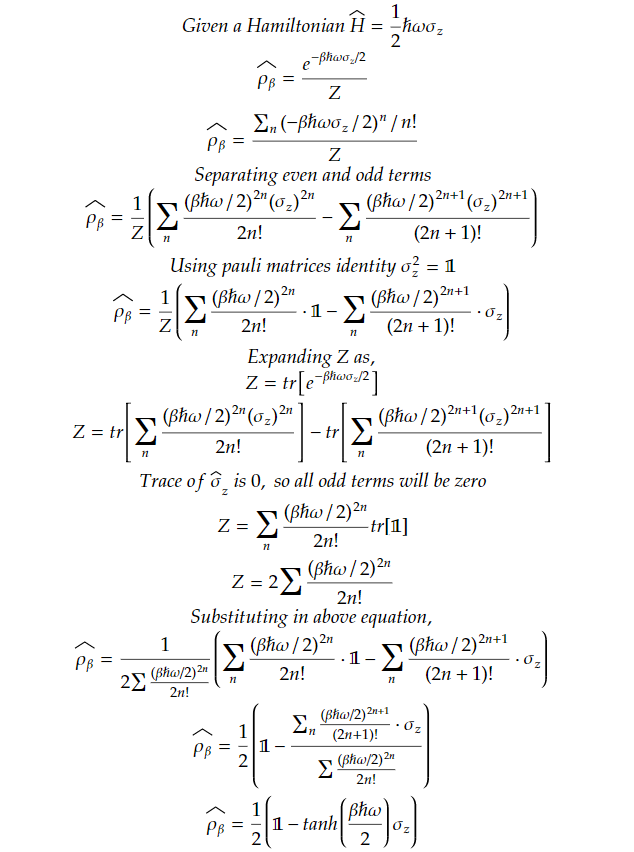

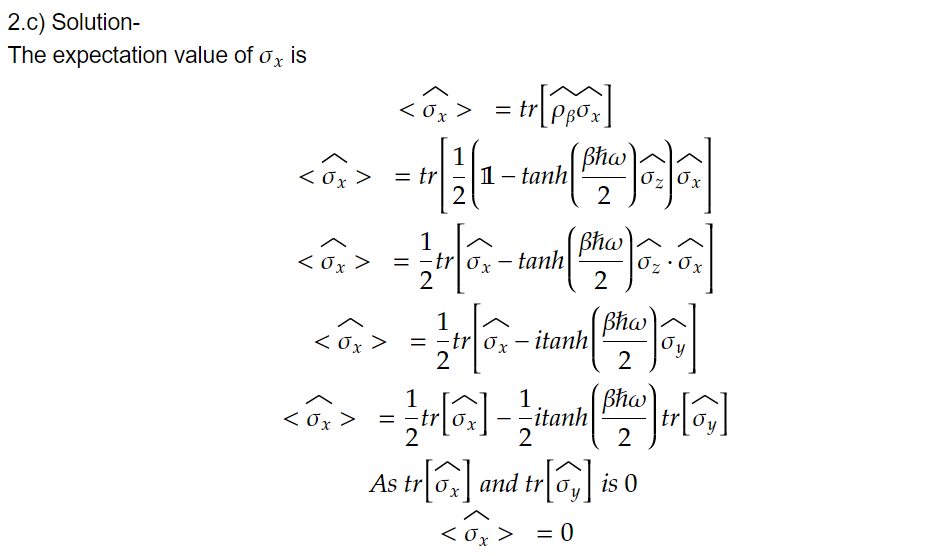

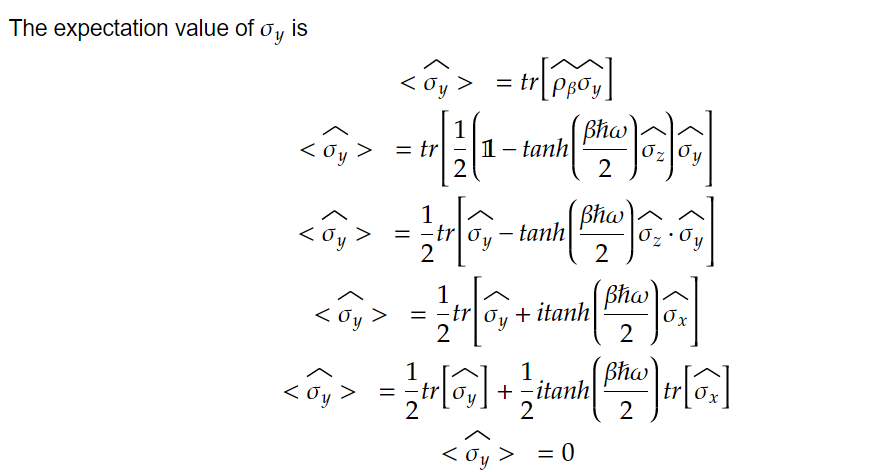

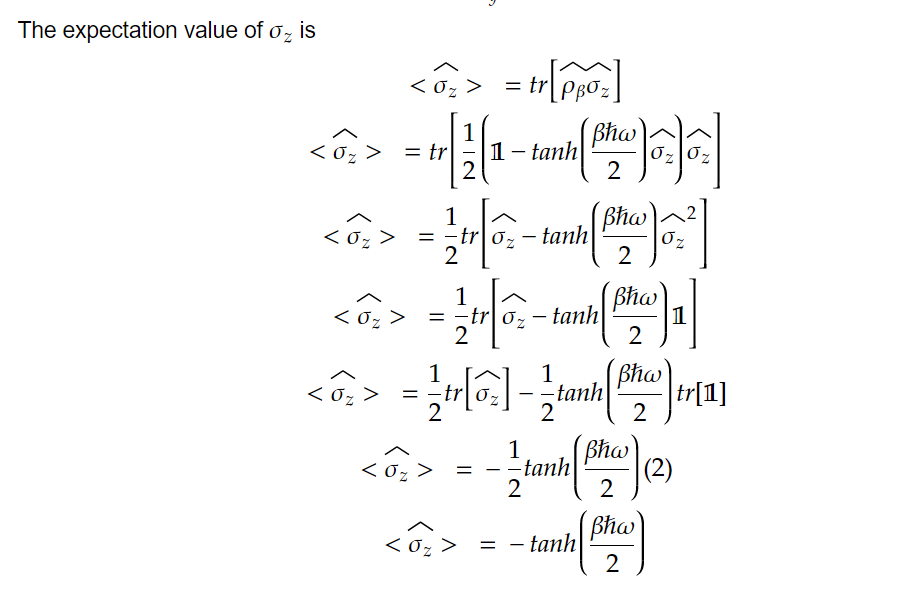

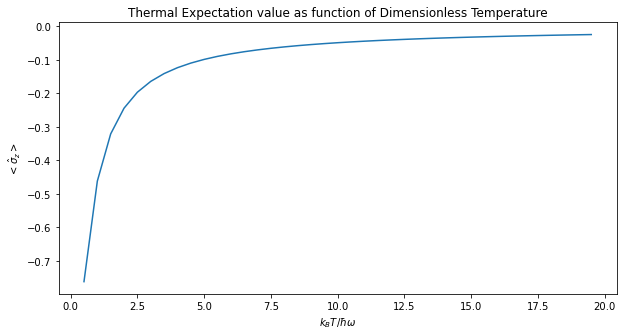

In [2]:
dimensionless_temperature=np.arange(0.5,20,0.5)   #random values of KT/hw
thermal_expectation_value=[]    #array to store expectation value of sigma_z

for temperature in dimensionless_temperature:
    expectation_value=-1*np.tanh(1/(2*temperature))  #expectation=-tanh(hw/2KT)
    thermal_expectation_value.append(expectation_value)
    
#Plot the expectation value
plt.subplots(figsize=(10,5))
plt.xlabel('$k_B T/\hbar\omega$')
plt.ylabel('$< \hat{\sigma}_z>$')
plt.title('Thermal Expectation value as function of Dimensionless Temperature')
plt.plot(dimensionless_temperature,thermal_expectation_value)
plt.show()

## 3. 
The following function samples a "biased coin", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works.

In [3]:
def biased_coin(p):
    r = random()
    if r<p:
        return 0
    else:
        return 1

(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function).

Text(0.5, 1.0, 'Output of biased coin with 200 coin tosses and p(head)=0.3')

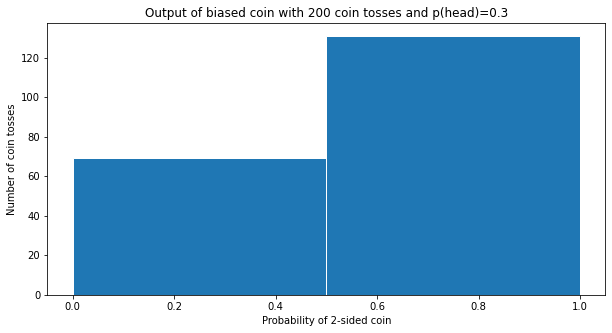

In [4]:
p=0.3   #given probability
number_of_shots=200   #number of coin tosses
output_biased_coin=[]    # to store output of coin tosses

for coin_toss in range(number_of_shots):
    output_biased_coin.append(biased_coin(p))
    
#Plot histogram
plt.subplots(figsize=(10,5))
plt.hist(output_biased_coin,bins=2,edgecolor='white')   #bins=2 for 2 outputs (heads and tails)
plt.xlabel('Probability of 2-sided coin')
plt.ylabel('Number of coin tosses')
plt.title('Output of biased coin with 200 coin tosses and p(head)=0.3')

(b) Write an analogous function that samples a "three-sided coin", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$.

In [5]:
def biased_three_sided_coin(p0,p1):
    r = random()
    if r<p0:
        return 0
    elif r<(p0+p1):
        return 1
    else:
        return 2

Text(0.5, 1.0, 'Output of biased coin with 200 coin tosses and p0=0.2 and p1=0.5')

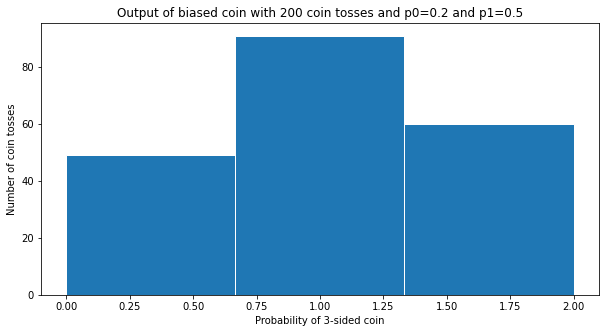

In [6]:
p0=0.2   #given probability
p1=0.5
number_of_shots=200   #number of coin tosses
output_biased_three_sided_coin=[]    # to store output of coin tosses

for coin_toss in range(number_of_shots):
    output_biased_three_sided_coin.append(biased_three_sided_coin(p0,p1))
    
#Plot histogram
plt.subplots(figsize=(10,5))
plt.hist(output_biased_three_sided_coin,bins=3,edgecolor='white')   #bins=3 for 3 outputs
plt.xlabel('Probability of 3-sided coin')
plt.ylabel('Number of coin tosses')
plt.title('Output of biased coin with 200 coin tosses and p0=0.2 and p1=0.5')

(c) Generalise the function to an "$N$-sided coin", which yields the result $i \in \{0,1,2,\ldots,N-1\}$ with probability $p_i$. Provide a histogram demonstrating that the function works as expected.

In [7]:
def biased_n_sided_coin(n,p):
    r = random()
    cumulative_probaility=0
    for i in range(n):
        cumulative_probaility += p[i]
        if r<cumulative_probaility:
            return i

Text(0.5, 1.0, 'Output of biased coin with 200 coin tosses and p0=0.1, p1=0.2, p2=0.4, p3=0.2, p4=0.1')

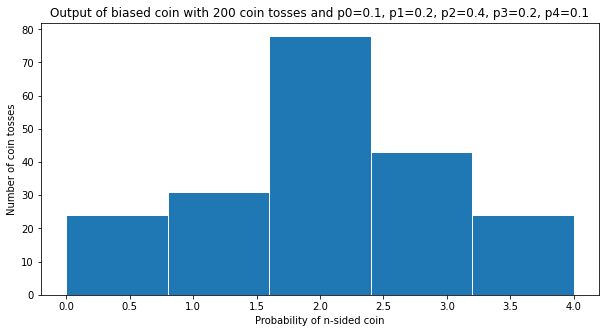

In [8]:
n=5
p0=0.1   #given probability
p1=0.2
p2=0.4
p3=0.2
p4=0.1
p=[p0,p1,p2,p3,p4]
number_of_shots=200   #number of coin tosses
output_biased_n_sided_coin=[]    # to store output of coin tosses

for coin_toss in range(number_of_shots):
    output_biased_n_sided_coin.append(biased_n_sided_coin(n,p))
    
#Plot histogram
plt.subplots(figsize=(10,5))
plt.hist(output_biased_n_sided_coin,bins=n,edgecolor='white')   #bins=n for n outputs
plt.xlabel('Probability of n-sided coin')
plt.ylabel('Number of coin tosses')
plt.title("Output of biased coin with 200 coin tosses and p0={}, p1={}, p2={}, p3={}, p4={}".format(p0,p1,p2,p3,p4))

(d) Can you generalise this to sample from a continuous probability distribution? Write a function that outputs a random number $x$ in the interval $x\in [0,1]$ according to the probability density $$ p(x) = \frac{\pi}{2} \sin(\pi x).$$ Demonstrate your function with a histogram.

In [9]:
def continuous_probability_distribution(n):
    # Step 1: Generate random x values between 0 and 1
    x=np.linspace(0,1,n)
    # Step 2: Prepare probability density
    p = []
    for i in range(len(x)):
        p.append((np.pi/2)*(np.sin(np.pi*x[i])))
    
    # Step 3: Normalizing probabilities
    total=sum(p)
    for i in range(len(p)):
            p[i] = p[i]/total
    
    # Step 4: Calculating output
    r = random()
    cumulative_probaility=0
    for i in range(len(x)):
        cumulative_probaility += p[i]
        if r<cumulative_probaility:
            return x[i]

Text(0.5, 1.0, 'Output of Probability Distribution with 5000 coin tosses')

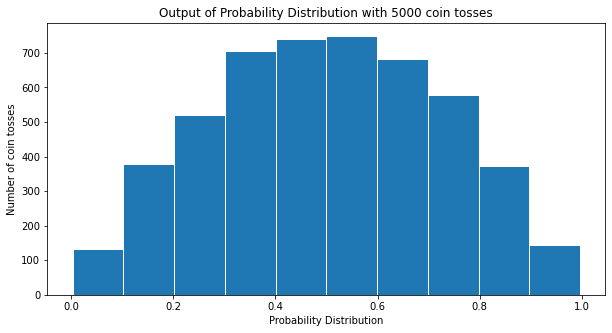

In [22]:
number_of_shots=5000   #number of coin tosses
output_probability_distribution=[]    # to store output of coin tosses

for shot in range(number_of_shots):
    output_probability_distribution.append(continuous_probability_distribution(number_of_shots))

#Plot histogram
plt.subplots(figsize=(10,5))
plt.hist(output_probability_distribution,edgecolor='white')
plt.xlabel('Probability Distribution')
plt.ylabel('Number of coin tosses')
plt.title('Output of Probability Distribution with 5000 coin tosses')

## 4.
In this exercise we will compare the thermal state of a qubit
$$ \hat{\rho}_\beta = \frac{{\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2}}{Z},$$
to the pure state
$$|\psi_\beta\rangle = \frac{1}{\sqrt{Z}}\left({\rm e}^{-\beta\hbar\omega/4}|0\rangle + {\rm e}^{\beta\hbar\omega/4}|1\rangle\right), $$
where $Z = {\rm tr}({\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2})$.

(a) Write down general expressions for the density matrices corresponding to both of the above states.

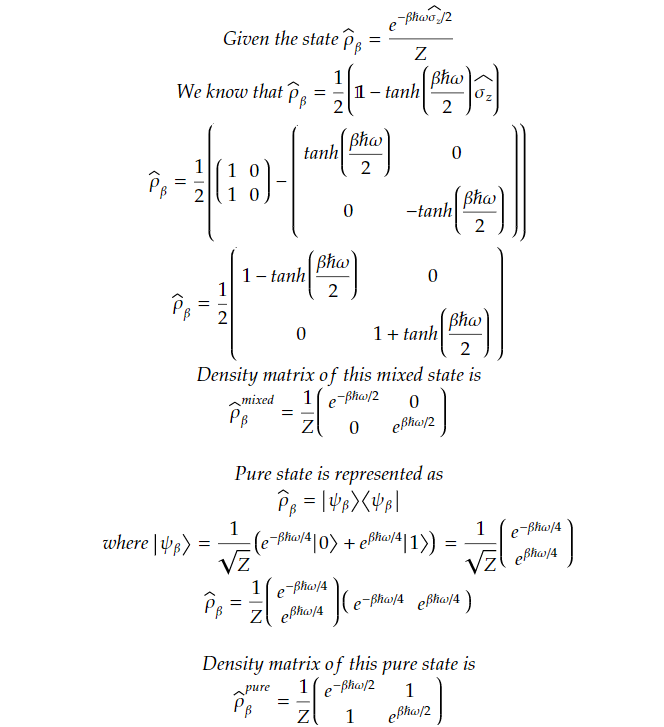

(b) Consider a projective measurement of the observable $\hat{\sigma}_z$. Give the probabilities of the two measurement outcomes for the thermal state $\hat{\rho}_\beta$. Give the analogous measurement outcome probabilities for the pure state $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_z\rangle$ for both states. Comment briefly on the results.

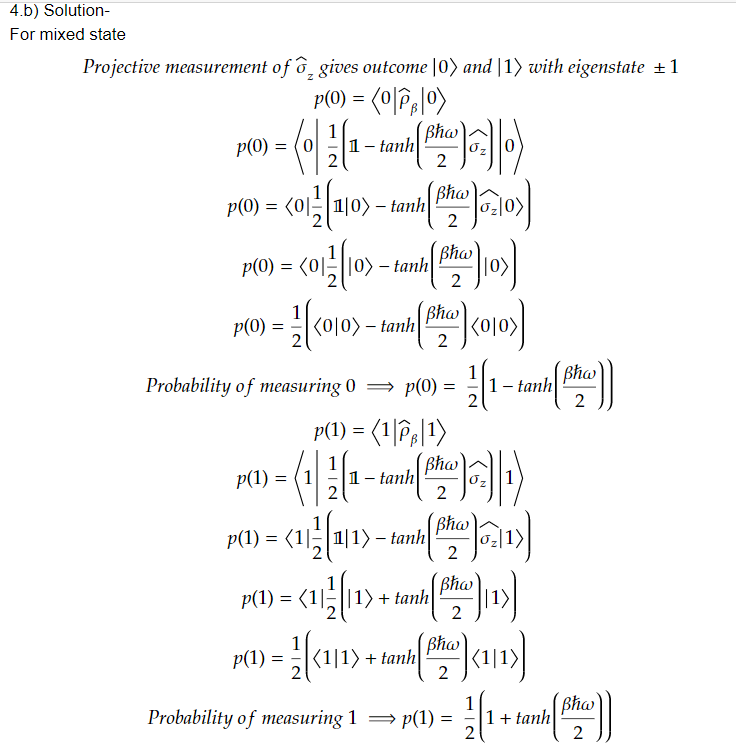

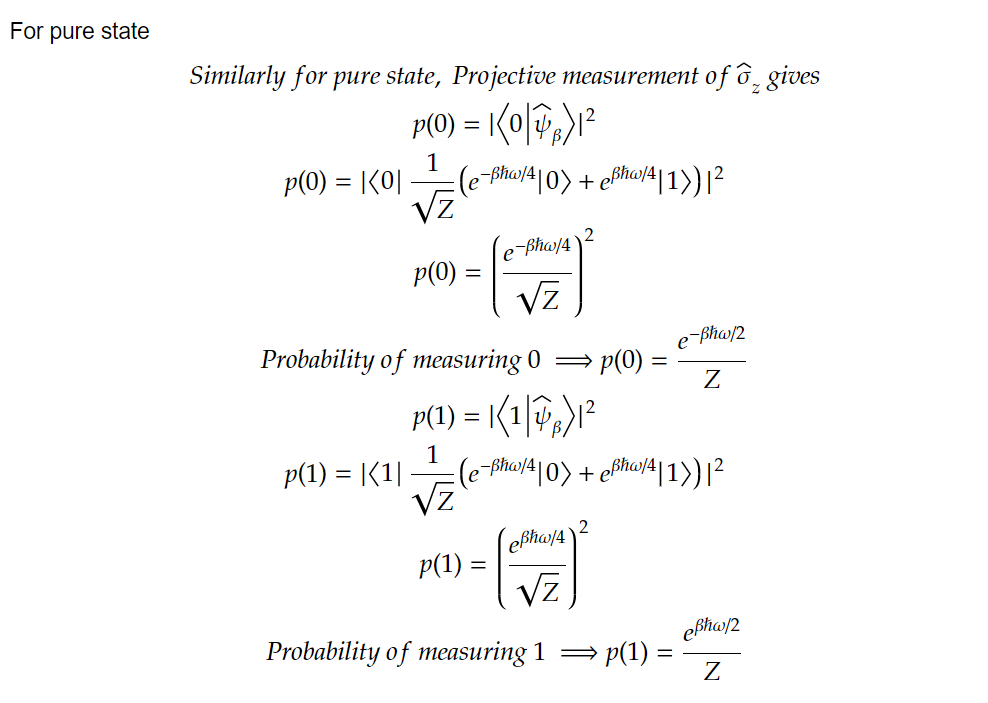

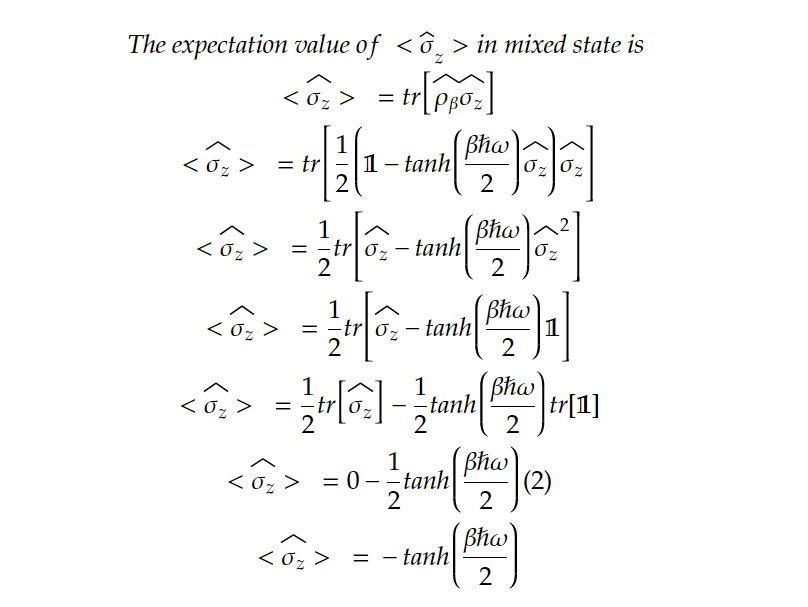

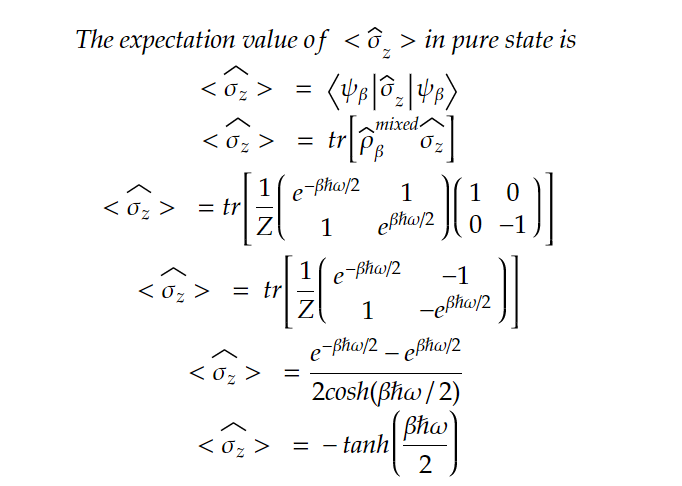

Comment-
The expectation value of $\langle \hat{\sigma}_z\rangle$ for both mixed and pure states is same. This means that we cannot distinguish between mixed and pure state after measuring in $\langle \hat{\sigma}_z\rangle$ basis.

(c) Now consider a projective measurement of the observable $\hat{\sigma}_x$. Give the measurement outcome probabilities for the two different states $\hat{\rho}_\beta$ and $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_x\rangle$ for both states. Comment briefly on the results.

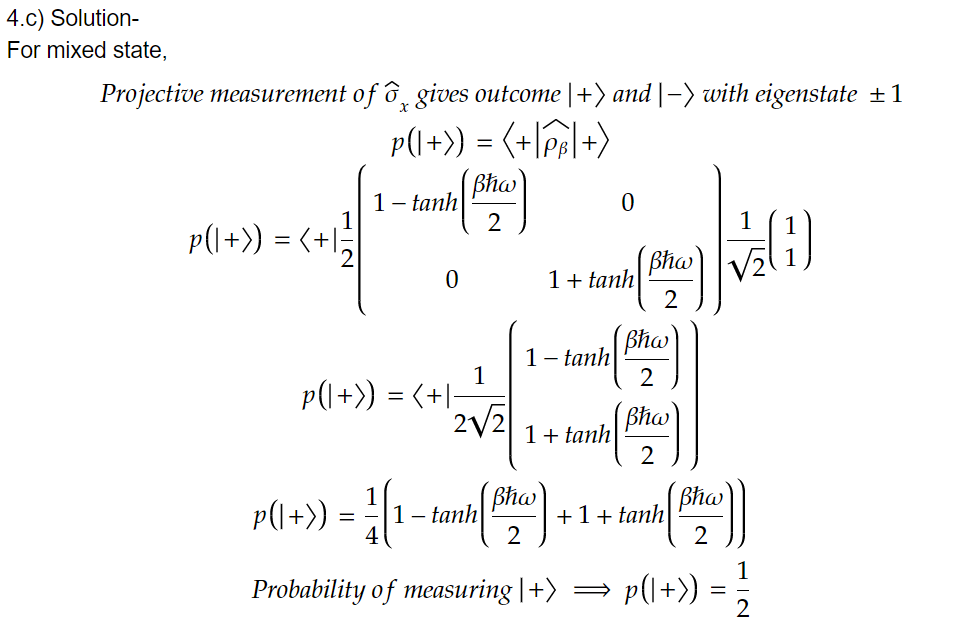

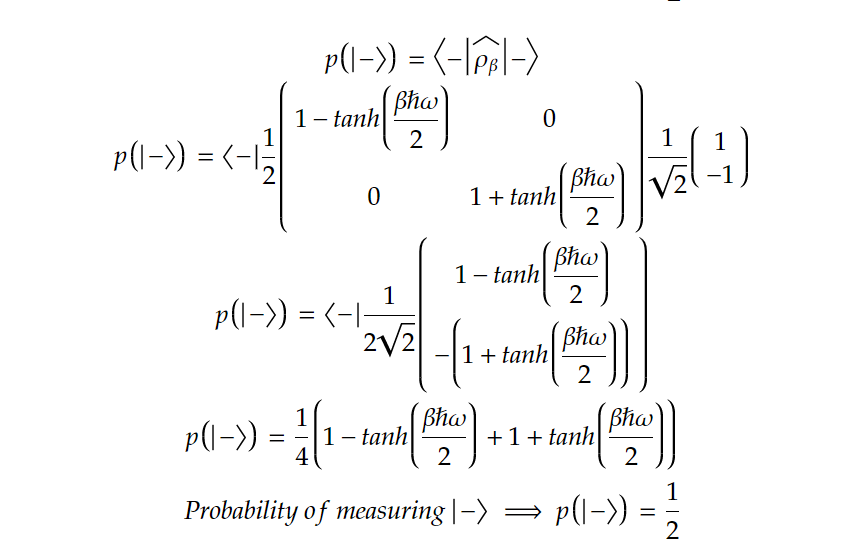

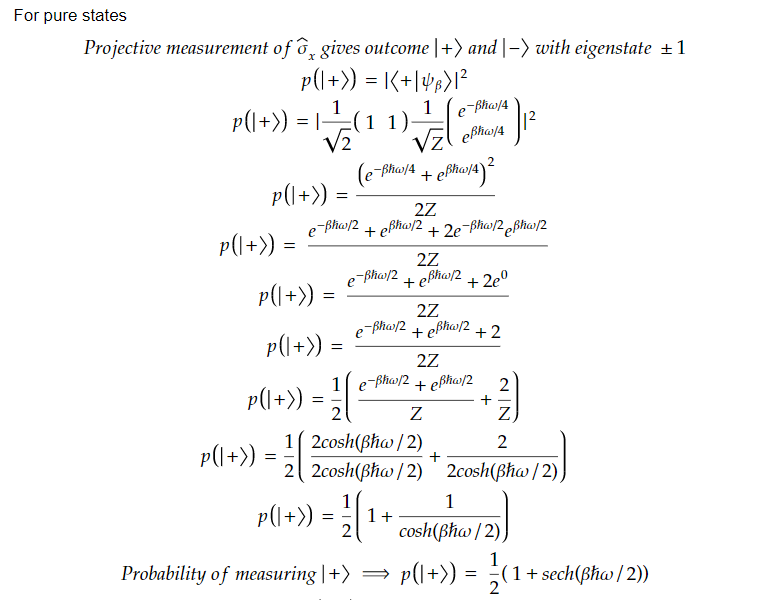

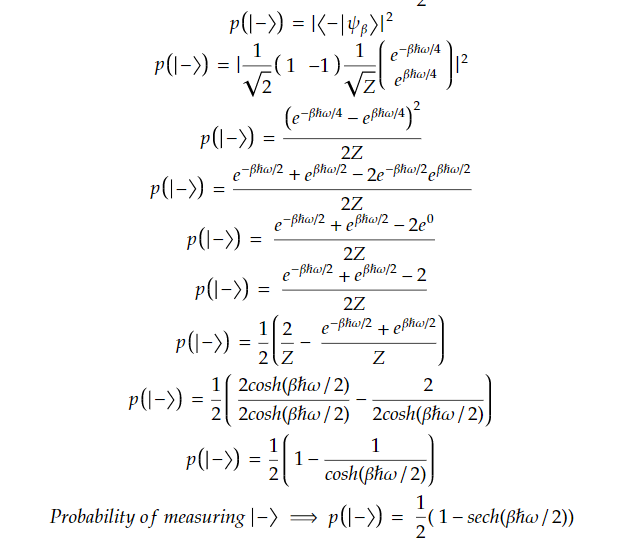

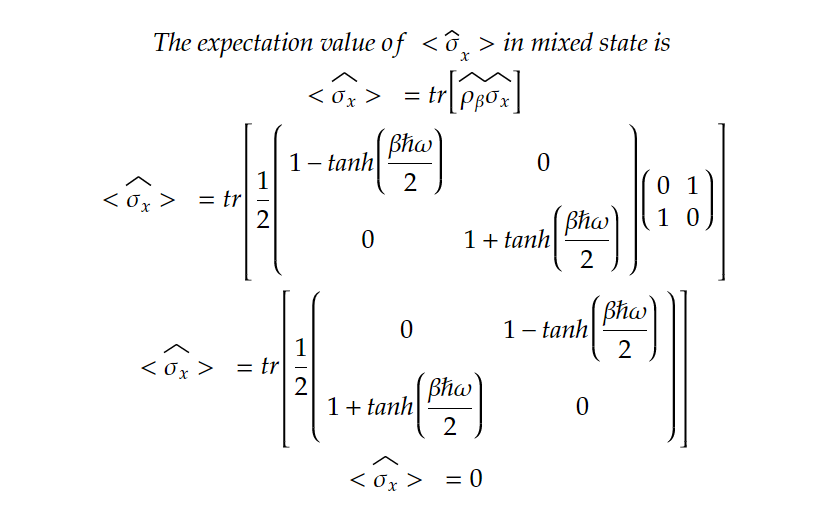

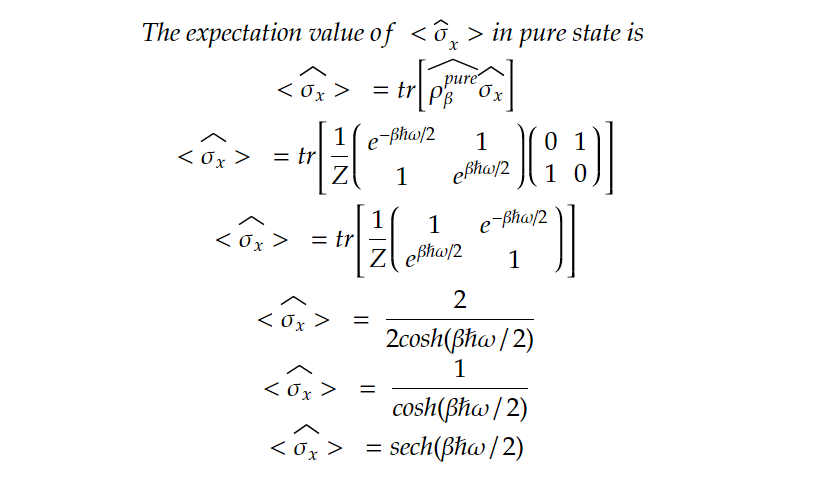

Comment-
The expectation value of $\langle \hat{\sigma}_x\rangle$ of mixed and pure states differ by a value of sech($\beta\hbar\omega/2$). Hence, the expectation value $\langle \hat{\sigma}_x\rangle$ fluctuates due to result of interference.

(d) Repeat the calculations for a projective measurement of $\hat{\sigma}_y$ and briefly comment on the result.

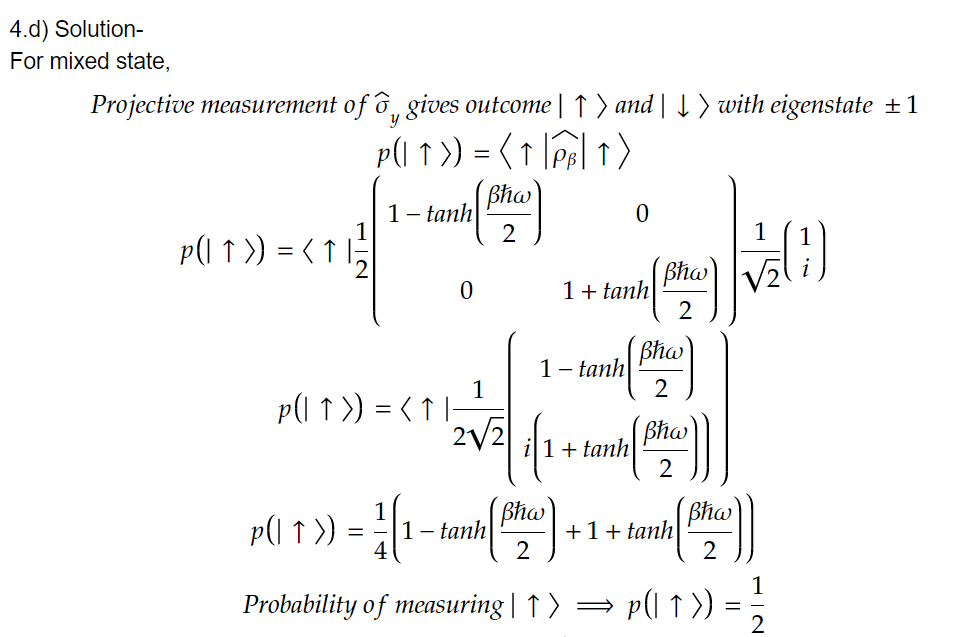

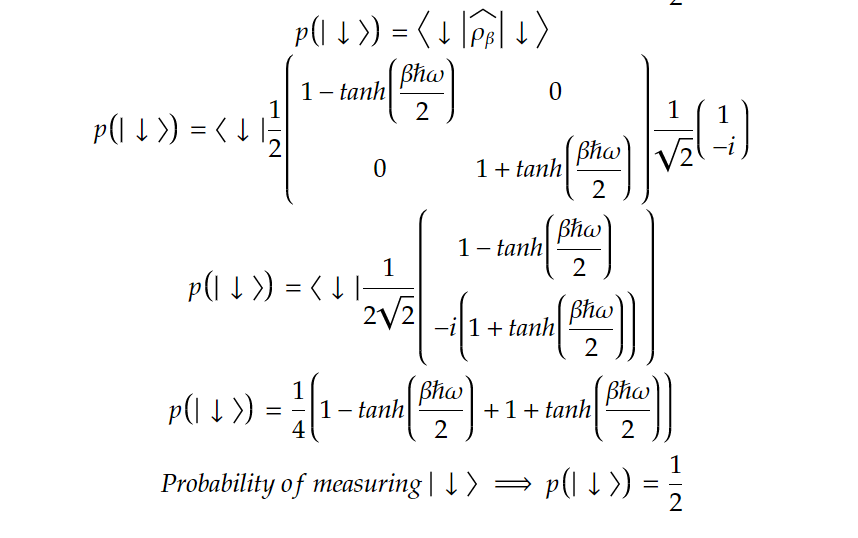

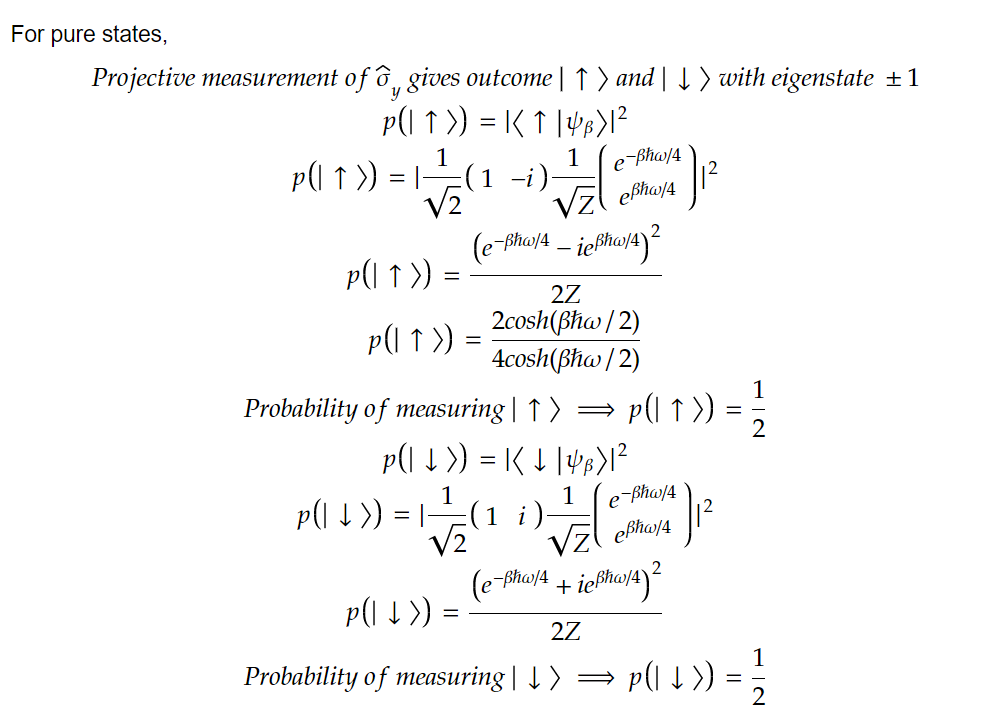

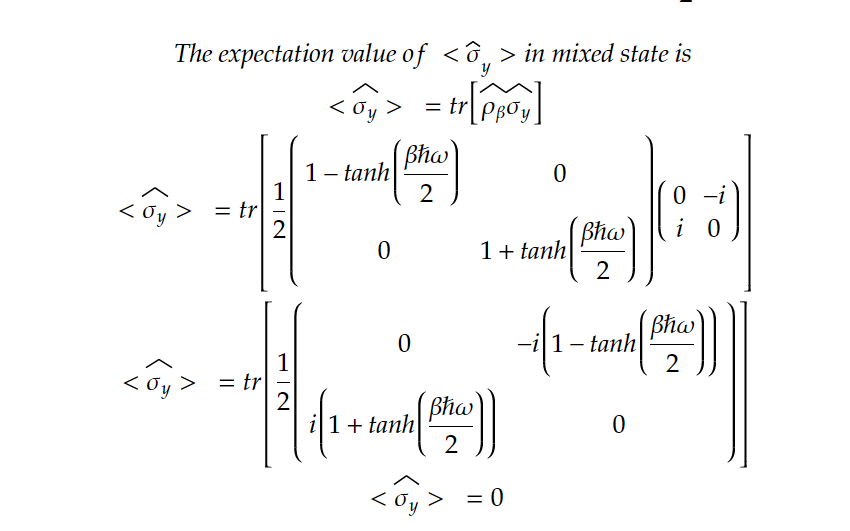

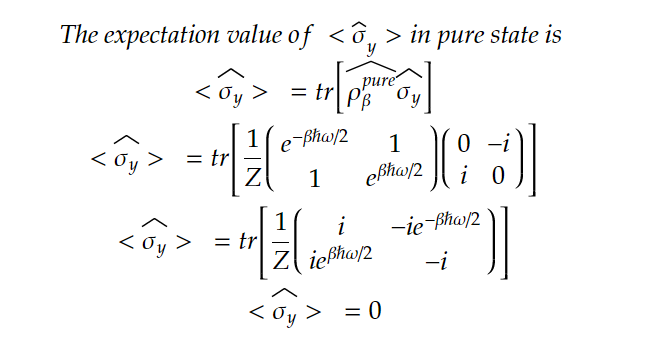

Comment-
The expectation value of $\langle \hat{\sigma}_y\rangle$ for both mixed and pure states is same and is equal to 0. In this case, the states are purely real and can't be measured by $\langle \hat{\sigma}_y\rangle$ which measures only in imaginary basis.

## 5. 
Consider the following simple decoherence model for a qubit. The Hamiltonian is 
$$ \hat{H} = \frac{\hbar\omega}{2} \hat{\sigma}_z,$$
where $\omega$ is a random variable that takes the values $\omega \in \{+\omega_0,-\omega_0\}$ with equal probabilities $p_+ = p_- = \tfrac{1}{2}$.

(a) Write down an analytical expression for the time-dependent density matrix describing the ensemble, starting from the initial condition $\hat{\rho}(0) = |+\rangle\langle +|$.

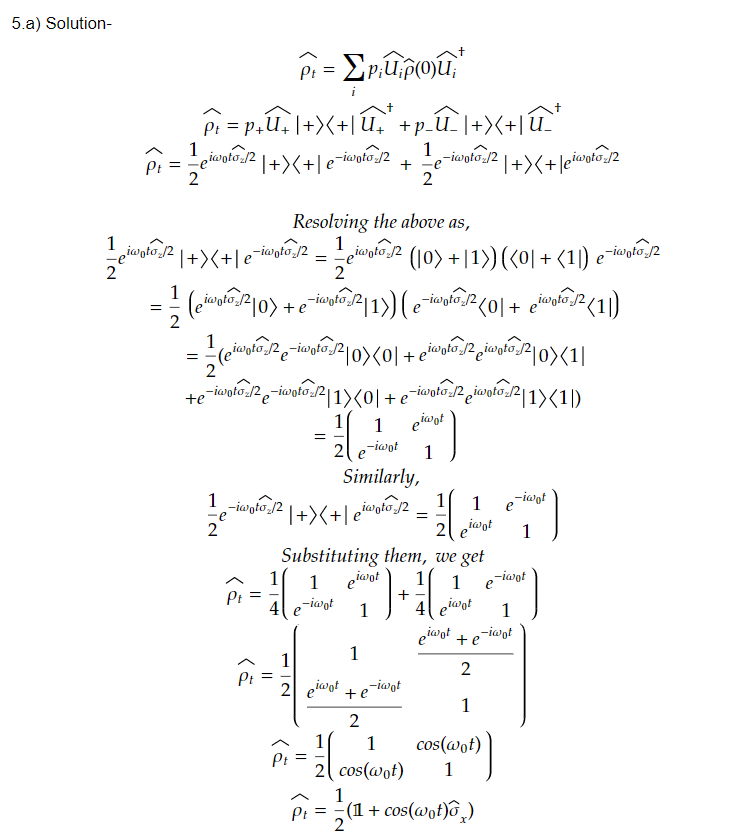

(b) The purity $P$ is defined by $P={\rm tr} \hat{\rho}^2$. It is a real number that varies between $P=1$ for a pure state and $P = 1/2$ for a maximally mixed state of a qubit. (More generally, $P$ varies between $1$ and $1/d$ for a system with Hilbert-space dimension $d$.) Plot the purity of the qubit density matrix as a function of time in the interval $\omega_0 t = [0,10]$. Comment briefly on what happens at $t = \pi/2\omega_0 $, $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$.

Text(0.5, 1.0, 'Purity of qubit density matrix as a function of time')

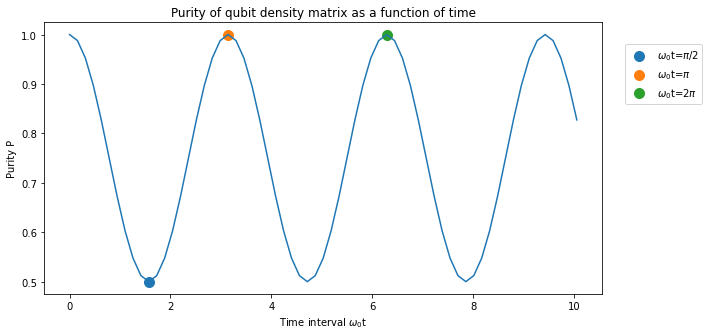

In [11]:
time_interval = np.arange(0,10+np.pi/20,np.pi/20)   #time interval wt
rho = []    # to store rho(t) calculated above
purity= []     # to store purity of rho

for i in range(len(time_interval)):
    rho.append(0.5*(identity+np.cos(time_interval[i])*sigma_x))   #rho(t)=1/2 * (I+cos(wt)X)
    purity.append(np.trace((rho[i])@(rho[i])))                  #purity=tr[rho^2]
    
    
#Plot the graph of Purity
plt.subplots(figsize=(10,5))
plt.plot(time_interval,purity)
plt.scatter(np.pi/2,purity[np.where(time_interval == np.pi/2)[0][0]],s=100, marker = 'o',label='$\omega_0$t=$\pi$/2')
plt.scatter(np.pi,purity[np.where(time_interval == np.pi)[0][0]],s=100, marker = 'o',label='$\omega_0$t=$\pi$')
plt.scatter(2*np.pi,purity[np.where(time_interval == 2*np.pi)[0][0]],s=100, marker = 'o',label='$\omega_0$t=2$\pi$')
plt.legend(loc=(1.04,0.7))
plt.xlabel('Time interval $\omega_0$t')
plt.ylabel('Purity P')
plt.title('Purity of qubit density matrix as a function of time')

At $\omega_0$t=$\pi$/2, the system reaches at a purity of 1/2, which is maximally mixed state of a qubit. At $\omega_0$t=$\pi$ and $\omega_0$t=2$\pi$, the system reaches at a purity of 1, which is a pure state.

## 6. 
Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations
$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$

(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

Text(0.5, 1.0, 'Expectation value $\\langle \\hat{\\sigma}_x\\rangle$ for M=20 random realisations')

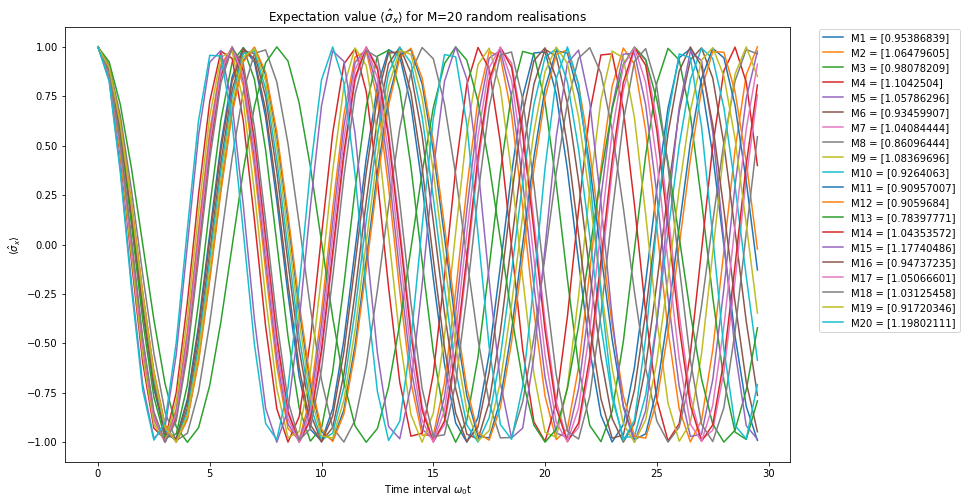

In [12]:
#initial values
M=20
hbar=1
w_0 = 1
g = 0.1*w_0
time_interval = np.arange(0,30,0.5)
expectation_value_x = np.zeros((M,len(time_interval),1))
realisation = np.zeros((M,1))

#Loop for M realizations
for i in range(M):
    #Step 1: Draw a random gaussian variable from a sample of mean and standard deviatian
    realisation[i] = np.random.choice(np.random.normal(w_0, g, M),1)
    
    #Step 2: Update Hamiltonian = hw(sigma_z)/2
    H = 0.5*hbar*realisation[i]*sigma_z
    
    #Step 3: Update time evolution operator
    U = expm(-1j*H*0.5)
    
    #Step 4: Initialize state rho_0=|+><+|
    rho_t = np.outer(plus,plus)
    
    #Step 5: Loop over current M to calculate expectation value for each rho_t
    for j in range(len(time_interval)):
        expectation_value_x[i,j] = np.real(np.array(np.trace(rho_t@sigma_x)))
        rho_t = U@(rho_t)@U.conj().T

        
#Plot the graph of expectation value of sigma_x
plt.subplots(figsize=(13,8))
for i in range(M):
    plt.plot(time_interval, expectation_value_x[i,:], label = 'M{} = {}'.format(i+1,realisation[i]))
plt.legend(loc=(1.04,0.3))
plt.xlabel('Time interval $\omega_0$t')
plt.ylabel('$\langle \hat{\sigma}_x\\rangle$')
plt.title('Expectation value $\langle \hat{\sigma}_x\\rangle$ for M=20 random realisations')

(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as
    $$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$
    where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

Text(0.5, 1.0, 'Average expectation value $\\langle \\hat{\\sigma}_x\\rangle$ for M=20 and M=$\\infty$ random realisations')

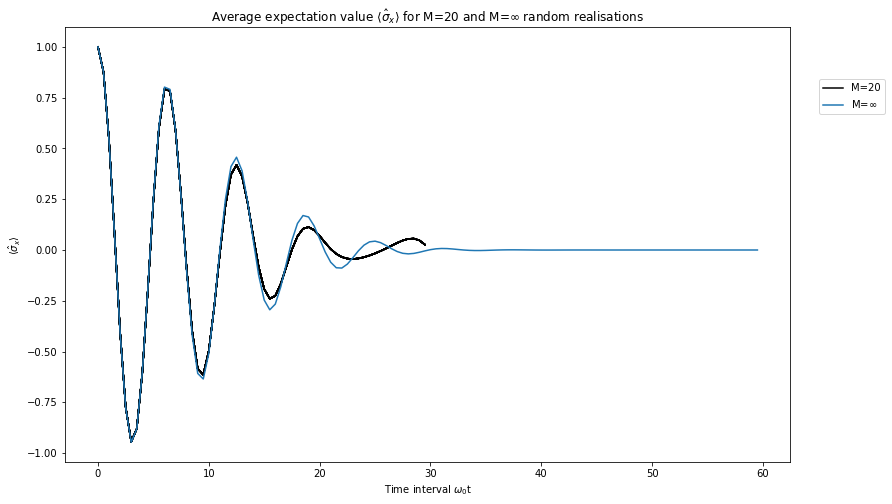

In [13]:
#For M=20, the average expected value is calculated using above formula
avg_expectation_value_x = np.zeros(M)
for i in range(M):
    avg_expectation_value_x = avg_expectation_value_x+expectation_value_x[i,:]
avg_expectation_value_x = avg_expectation_value_x/M
    
#As M goes to infinty the expectation value of qubit dynamics is calculated as e^-(g^2 t^2/2)*cos(wt)
time_interval2=np.arange(0,60,0.5)
avg_expectation_value_x_infinty = np.exp(-(g*g*time_interval2*time_interval2)/2)*np.cos(w_0*time_interval2)


plt.subplots(figsize=(13,8))
#Plot the graph of expectation value of sigma_x for M=20
plot1 = plt.plot(time_interval, avg_expectation_value_x,'black')

#Plot the graph of expectation value of sigma_x for M=infinity
plot2 = plt.plot(time_interval2, avg_expectation_value_x_infinty)

plt.legend([plot1[0],plot2[0]], ['M=20','M=$\infty$'], loc=(1.04,0.8))
plt.xlabel('Time interval $\omega_0$t')
plt.ylabel('$\langle \hat{\sigma}_x\\rangle$')
plt.title('Average expectation value $\langle \hat{\sigma}_x\\rangle$ for M=20 and M=$\infty$ random realisations')

For small number of realisations (M=20 in this case), the expectation value is still somewhat fluctuating till last realisation. But as M goes to $\infty$, the deviation(g) and time(t) factor in the exponent become dominant leading to dampened oscillations, i.e. decoherence in the system.

## 7. 
The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$
where $\hat{\sigma}_\pm = \frac{1}{2}(\hat{\sigma}_x\pm{\rm i}\hat{\sigma}_y)$ are the usual qubit raising and lowering operators. 

(a) Verify that the Kraus operators above constitute a CPTP map.

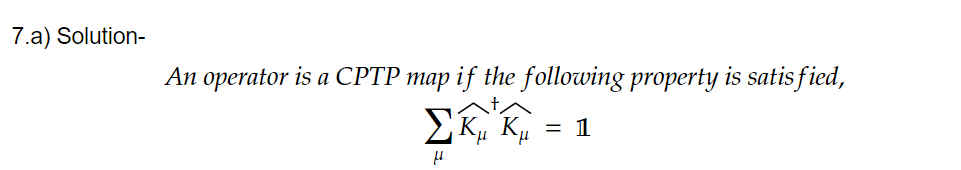

In [14]:
r = 1/2
sigma_plus = 0.5*(sigma_x+1j*sigma_y)
sigma_minus = 0.5*(sigma_x-1j*sigma_y)

K_0 = np.sqrt(1-r)*sigma_plus@sigma_minus + sigma_minus@sigma_plus
K_1 = np.sqrt(r)*sigma_minus

sum_of_K = K_0.conjugate().T@K_0 + K_1.conjugate().T@K_1  # if this is equal to identity then it is a valid CPTP map
print("The sum of Kraus operators is equal to Identity, hence it is a valid CPTP map.\n",sum_of_K)

The sum of Kraus operators is equal to Identity, hence it is a valid CPTP map.
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]


(b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

Text(0.5, 1.0, 'Expectation value of $\\langle \\hat{\\sigma}_x\\rangle$,$\\langle \\hat{\\sigma}_y\\rangle$,$\\langle \\hat{\\sigma}_y\\rangle$ as function of r')

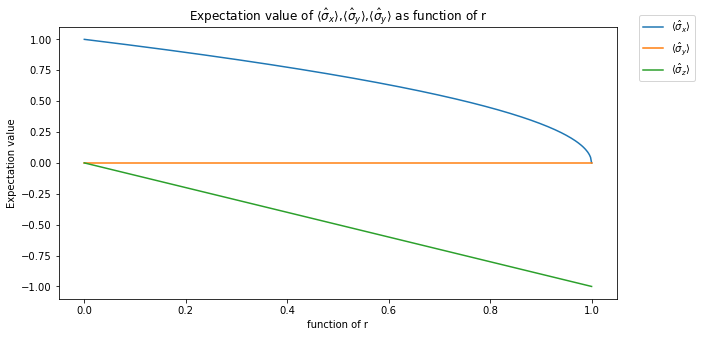

In [15]:
rho_0 = np.outer(plus,plus)    #initial state
r_points = np.linspace(0,1,500)   #function of r
expectation_value_x=[]      #store expectation value of sigma x
expectation_value_y=[]      #store expectation value of sigma y
expectation_value_z=[]      #store expectation value of sigma z

def Kraus_density_matrix(r,rho):
    #define Kraus operators
    K_0 = np.sqrt(1-r)*sigma_plus@sigma_minus + sigma_minus@sigma_plus
    K_1 = np.sqrt(r)*sigma_minus
    
    #calculate density matrix as k_u*rho*k_u_conjugate
    return K_0@rho@K_0.conjugate().T + K_1@rho@K_1.conjugate().T

def expectation_value(rho,pauli_op):
    #calculate expectation value of pauli operator = tr[rho*pauli_operator]
    return np.real(np.trace(rho@pauli_op))

#calculate the expectation value and density matrix for each r point
for r in r_points:
    kraus_density_matrix = Kraus_density_matrix(r,rho_0)
    expectation_value_x.append(expectation_value(kraus_density_matrix,sigma_x))
    expectation_value_y.append(expectation_value(kraus_density_matrix,sigma_y))
    expectation_value_z.append(expectation_value(kraus_density_matrix,sigma_z))

#Plot the graph of expectation value as function of r
plt.subplots(figsize=(10,5))
plt.plot(r_points,expectation_value_x, label = '$\\langle \hat{\sigma}_x\\rangle$')
plt.plot(r_points,expectation_value_y,label = '$\\langle \hat{\sigma}_y\\rangle$')
plt.plot(r_points,expectation_value_z, label = '$\\langle \hat{\sigma}_z\\rangle$')
plt.xlabel('function of r')
plt.ylabel('Expectation value')
plt.legend(loc=(1.04,0.8))
plt.title('Expectation value of $\\langle \hat{\sigma}_x\\rangle$,$\\langle \hat{\sigma}_y\\rangle$,$\\langle \hat{\sigma}_y\\rangle$ as function of r')

(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.

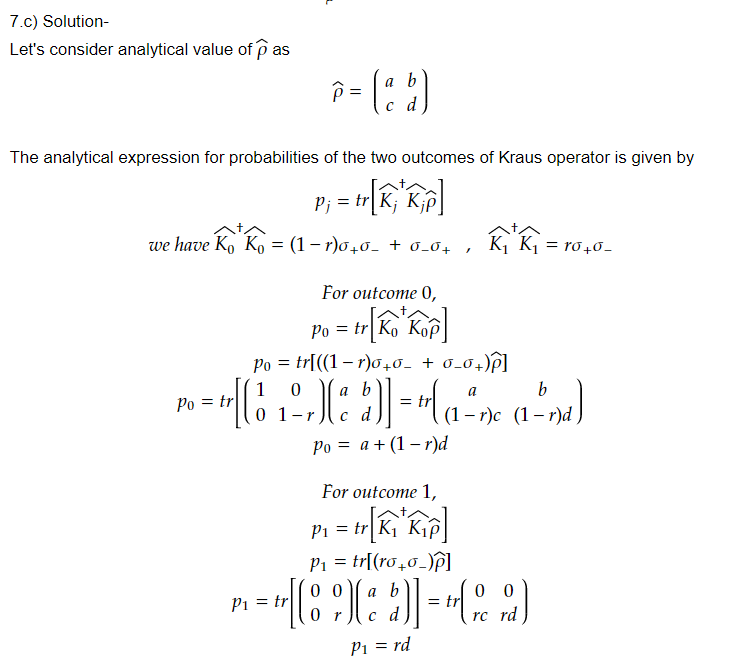

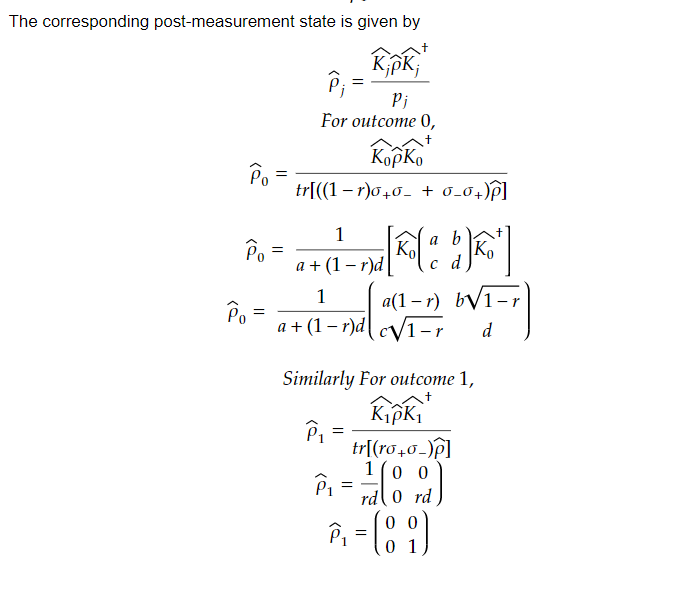

Text(0.5, 1.0, 'Post measurement state with 200 measurements')

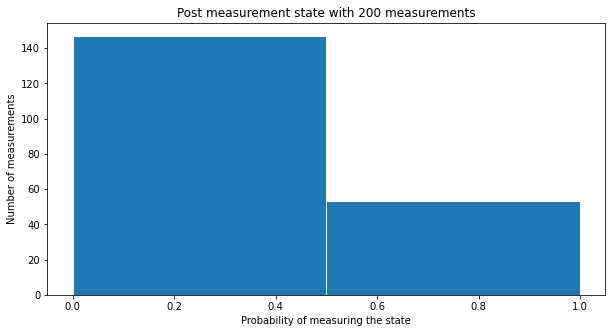

In [16]:
#initial states
rho_0 = np.outer(plus,plus)
r = 0.5
K_0 = np.sqrt(1-r)*sigma_plus@sigma_minus + sigma_minus@sigma_plus
K_1 = np.sqrt(r)*sigma_minus

p_0 = np.trace(K_0.conjugate().T@K_0@rho_0)   #probability of outcome 0 = K_0(dagger)*K_0*rho_0
number_of_shots=200        #number of measurements
measurement_outcome=[]    # to store output of each measurement

for measurement in range(number_of_shots):
    measurement_outcome.append(biased_coin(p_0))
    
#Plot histogram
plt.subplots(figsize=(10,5))
plt.hist(measurement_outcome,bins=2,edgecolor='white')
plt.xlabel('Probability of measuring the state')
plt.ylabel('Number of measurements')
plt.title('Post measurement state with 200 measurements')

(d) Now consider the generalised measurement defined by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$
As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

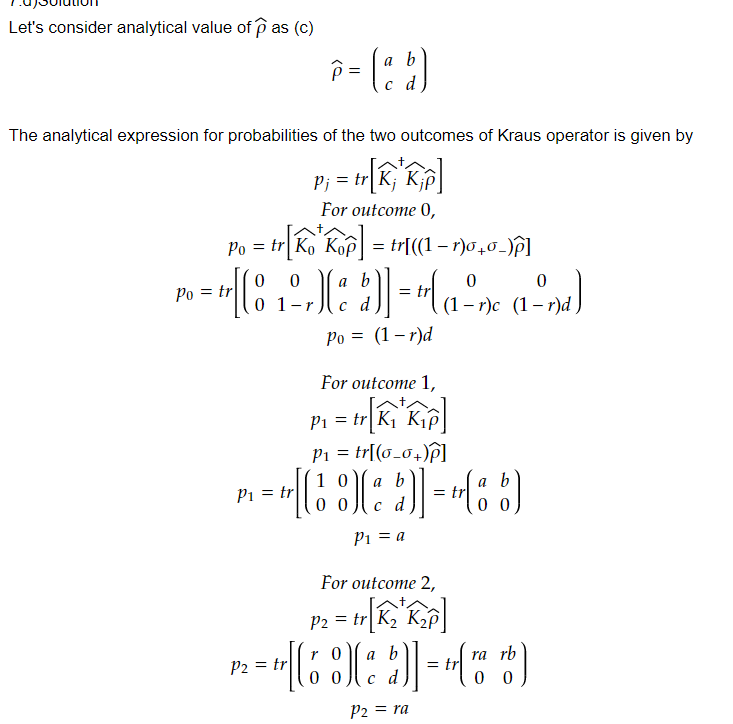

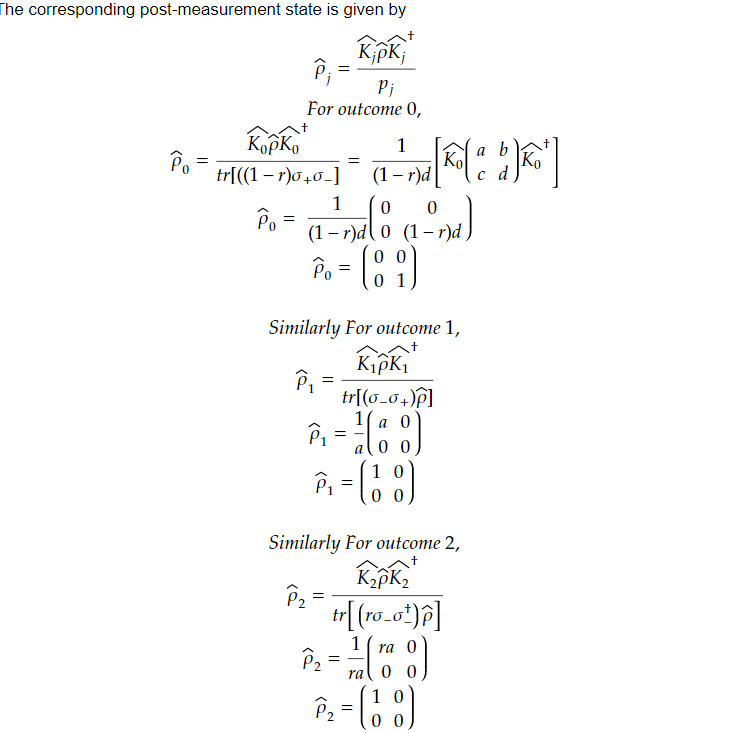

Text(0.5, 1.0, 'Post measurement state with 200 measurements')

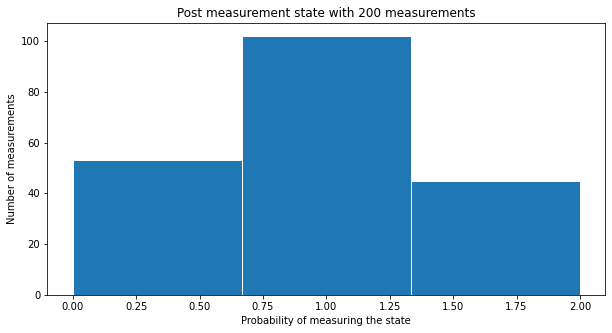

In [17]:
#initial states
rho_0 = np.outer(plus,plus)
r=0.5
K_0 = (1-r)**0.5*sigma_plus@sigma_minus
K_1 = sigma_minus@sigma_plus
K_2 = r**0.5*sigma_minus

p_0 = np.trace(K_0.conjugate().T@K_0@rho_0)   #probability of outcome 0
p_1 = np.trace(K_1.conjugate().T@K_1@rho_0)   #probability of outcome 1
number_of_shots=200        #number of measurements
measurement_outcome_3=[]    # to store output of each measurement

for measurement in range(number_of_shots):
    measurement_outcome_3.append(biased_three_sided_coin(p_0,p_1))
    
#Plot histogram
plt.subplots(figsize=(10,5))
plt.hist(measurement_outcome_3,bins=3,edgecolor='white')
plt.xlabel('Probability of measuring the state')
plt.ylabel('Number of measurements')
plt.title('Post measurement state with 200 measurements')

## 8. 
(a) The partial trace over one qubit of a two-qubit system is defined by

$$ \hat{\rho}_A = {\rm tr}_B ( \hat{\rho}) = \sum_{j=0}^1 \langle b_j| \hat{\rho}|b_j\rangle = \sum_{j=0}^1 (\hat{\mathbb{1}}_A\otimes\langle b_j|) \hat{\rho}(\hat{\mathbb{1}}_A\otimes| b_j\rangle), $$

where $\{|b_j\rangle\}$ is any orthonormal basis in the Hilbert space of qubit $B$. Assume that $|b_{0}\rangle = |0\rangle$ and $|b_1\rangle = |1\rangle$ are the computational basis states. Construct the Kraus operators describing the above CPTP map. Verify numerically that the Kraus operators obey the completeness relation required for a CPTP map.

In [18]:
#initial states
b_0 = np.array([1,0])
b_1 = np.array([0,1])

K_0 = np.kron(np.eye(2),b_0)
K_1 = np.kron(np.eye(2),b_1)

check_complete= K_0.conj().T@K_0  + K_1.conj().T@K_1 #this should be equal to identity for the operator to be valid CPTP map
print(check_complete)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


(b) Now consider again the two-qubit problem described by the Hamiltonian

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z,$$

which we saw in question 8 of Worksheet 1. Simulate the dynamics starting from the pure state $|\psi(0)\rangle = |10\rangle$. Use the parameters $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$, and simulate up to a time $Jt = 20$. (You can either re-use your solution from Worksheet 1, or adapt the code from the solution provided.) Compute the reduced density matrix of qubit $A$ and plot its purity, $P = {\rm tr}(\hat{\rho}_A^2)$, as a function of time.

C:\Users\aditi\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Purity as function of time with $\\omega_A = \\omega_B$')

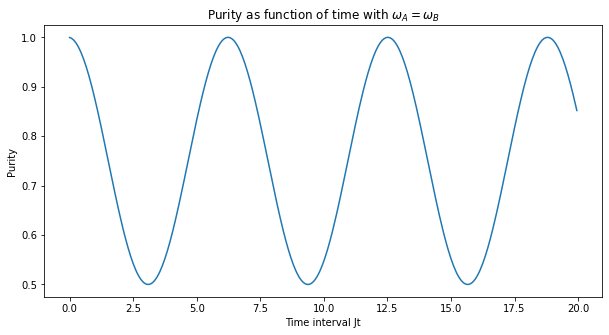

In [23]:
def purity_of_density_matrix(H,psi_0,time_interval):
    purity_of_qubit=[]     #to store purity values
    #Step 1: Define time evolution operator
    U = expm(-1j*H*0.05)    
    
    #Step 2: Initialize qubit state to psi_0
    psi_t = psi_0
    
    #Step 3: Loop over time interval to calculate purity
    for time in time_interval:
        #Step 4: Evolve state psi_t
        psi_t = U@psi_t
        
        #Step 5: Compute the reduced density matrix as sum of K_i*(|psi_t><psi_t|)*K_i(dagger)
        rho = np.outer(psi_t.conjugate(),psi_t)
        K_0 = np.kron(np.eye(2),b_0)
        K_1 = np.kron(np.eye(2),b_1)
        density_matrix = K_0@rho@K_0.T + K_1@rho@K_1.T
        
        #Step 6: Compute purity = tr[density_matrix^2]
        purity = np.trace(density_matrix@density_matrix)
        purity_of_qubit.append(purity)
    
    return purity_of_qubit

def Hamiltonian(hbar,w_A,w_B,J,V):
    return -0.5*hbar*w_A*np.kron(sigma_z,identity) - 0.5*hbar*w_B*np.kron(identity,sigma_z) + 0.25*hbar*J*(np.kron(sigma_x,sigma_x) + np.kron(sigma_y,sigma_y)) + 0.5*hbar*V*np.kron(sigma_z,sigma_z)

#initial values
hbar=1
w_A=w_B=1
J=V=0.5*w_A
Jt=20
psi_0 = np.array([0,0,1,0])
time_interval = np.arange(0,Jt,0.05)
purity_of_qubit = []  #to store purity of qubit A

# The Hamiltonian is defined as follows
H = Hamiltonian(hbar,w_A,w_B,J,V)
#Calculate purity of qubit
purity_of_qubit = purity_of_density_matrix(H,psi_0,time_interval)

#Plot the graph of purity
plt.subplots(figsize=(10,5))
plt.plot(time_interval,purity_of_qubit)
plt.xlabel('Time interval Jt')
plt.ylabel('Purity')
plt.title('Purity as function of time with $\omega_A = \omega_B$')

(c) Repeat the purity calculation of part (b) but with the parameters $\omega_A = 2\omega_B$ and $J=V=0.5\omega_A$. Comment on the differences between the results of (b) and (c).

C:\Users\aditi\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Purity as function of time with $\\omega_A = 2\\omega_B$')

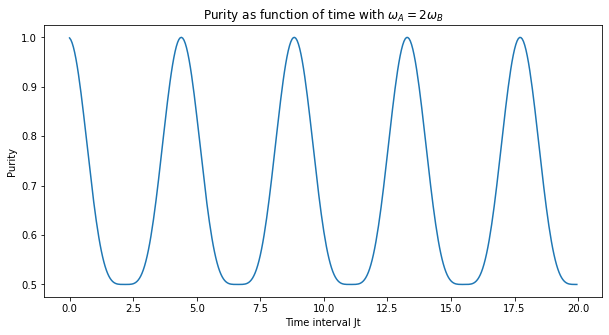

In [24]:
purity_of_qubit_2=[]
# The Hamiltonian is defined as follows
w_B=1
w_A=2*w_B
J=V=0.5*w_A
H = Hamiltonian(hbar,w_A,w_B,J,V)
#Calculate purity of qubit
purity_of_qubit_2 = purity_of_density_matrix(H,psi_0,time_interval)

#Plot the graph of purity
plt.subplots(figsize=(10,5))
plt.plot(time_interval,purity_of_qubit_2)
plt.xlabel('Time interval Jt')
plt.ylabel('Purity')
plt.title('Purity as function of time with $\omega_A = 2\omega_B$')

Difference between results in (b) and (c) can be shown by the detuning factor $\delta = \omega_{B} - \omega_{A}$. The principle of resonance states that the transfer of energy due to excitation that oscillates back and forth between two state (01 and 10 in our case) is most effective when $|\delta| << J$,.i.e. the frequency difference is very less than coupling.

In the first scenario (b) when $\omega_{A}=\omega_{B}$, this factor is $\delta = \omega_{B} - \omega_{A}=0$. This is the best case scenario where we get a maximally entangled state.

In the second scenario (c) when $\omega_{A}=2\omega_{B}$, this factor is $\delta = \omega_{B} - \omega_{A}=-1$. And $J=0.5*\omega_{A} = 1$, so we have $|\delta| = J$. In this case, the state revoles around axis perpendicular to maximally entangled state.